In [1]:
from pymongo import MongoClient
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (5,4)


client = MongoClient()

db = client.league_of_legends

In [2]:
def get_df(df):
    cols = ['highestAchievedSeasonTier','kills', 'deaths', 'assists', 'largestKillingSpree', 'largestMultiKill', 'killingSprees', 'longestTimeSpentLiving', 'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills', 'unrealKills', 'totalDamageDealt', 'magicDamageDealt', 'physicalDamageDealt', 'trueDamageDealt', 'largestCriticalStrike', 'totalDamageDealtToChampions', 'magicDamageDealtToChampions', 'physicalDamageDealtToChampions', 'trueDamageDealtToChampions', 'totalHeal', 'totalUnitsHealed', 'damageSelfMitigated', 'damageDealtToObjectives', 'damageDealtToTurrets', 'visionScore', 'timeCCingOthers', 'totalDamageTaken', 'magicalDamageTaken', 'physicalDamageTaken', 'trueDamageTaken', 'goldEarned', 'goldSpent', 'turretKills', 'inhibitorKills', 'totalMinionsKilled', 'neutralMinionsKilled', 'totalTimeCrowdControlDealt', 'champLevel', 'visionWardsBoughtInGame', 'sightWardsBoughtInGame', 'combatPlayerScore', 'objectivePlayerScore', 'totalPlayerScore', 'totalScoreRank', 'playerScore0', 'playerScore1', 'playerScore2', 'playerScore3', 'playerScore4', 'playerScore5', 'playerScore6', 'playerScore7', 'playerScore8', 'playerScore9']
    new_df = pd.DataFrame(columns=cols)
    for i in range(len(df)):
        if df.iloc[i,1] != []:
            for participant in df.iloc[i,1]:
                try:
                    tier = participant['highestAchievedSeasonTier']
                except:
                    continue
                if tier in ('BRONZE', 'PLATINUM'):
                    row = {
                        'highestAchievedSeasonTier': tier
                    }
                    for c in cols[1:]:
                        row[c] = participant['stats'][c]
                    new_df = new_df.append(row, ignore_index=True)
    return new_df

In [3]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
# PCA
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split

In [54]:
def plot_svm_pca(df):

    X = df.iloc[:,1:].values
    X = s.fit_transform(X)
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    classifier = svm.SVC()
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(s.fit_transform(X_test))
    f1 = X_pca[:,0]
    f2 = X_pca[:,1]
    l = []
    for i in range(0, len(y_test)):
        if y_test[i] == "BRONZE":
            l.append("blue")
        else:
            l.append("lime")
    labels = []
    for i in range(0, len(y_test)):
        if y_test[i] == pred[i] == "BRONZE":
            labels.append('blue')
        elif y_test[i] == pred[i] == "PLATINUM":
            labels.append('lime')
        else:
            labels.append('red')
    plt.title("Actual")
    plt.scatter(f1, f2, c=l, s=4, cmap='brg')
    plt.show()
    plt.title("Predicted")
    plt.scatter(f1, f2, c=labels, s=4)
    plt.show()
    print ("TEST SET ACC: ", classifier.score(X_test, y_test))

/Users/yuliabarannikova/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


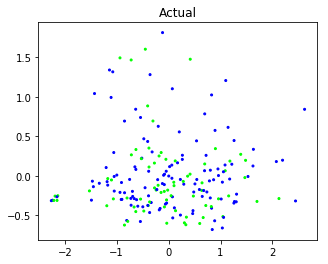

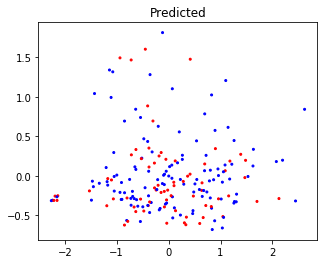

TEST SET ACC:  0.632653061224


In [13]:
plot_svm_pca(df)

In [6]:
def plot_svm_tsne_selected(df, features):
    X = df[features].values
    X = s.fit_transform(X)
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    classifier = svm.SVC()
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    X_tsne = TSNE(n_components=2).fit_transform(s.fit_transform(X_test))
    f1 = X_tsne[:,0]
    f2 = X_tsne[:,1]
    l = []
    for i in range(0, len(y_test)):
        if y_test[i] == "BRONZE":
            l.append("blue")
        else:
            l.append("lime")
    labels = []
    for i in range(0, len(y_test)):
        if y_test[i] == pred[i] == "BRONZE":
            labels.append('blue')
        elif y_test[i] == pred[i] == "PLATINUM":
            labels.append('lime')
        else:
            labels.append('red')
    plt.title("Actual")
    plt.scatter(f1, f2, c=l, s=4, cmap='brg')
    plt.show()
    plt.title("Predicted")
    plt.scatter(f1, f2, c=labels, s=4)
    plt.show()
    print ("TEST SET ACC: ", classifier.score(X_test, y_test))

In [55]:
from sklearn.manifold import TSNE
from sklearn.metrics import precision_recall_fscore_support

def plot_svm_tsne(df):
    X = df.iloc[:,1:].values
    X = s.fit_transform(X)
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    classifier = svm.SVC(C=50)
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    X_tsne = TSNE(n_components=2).fit_transform(s.fit_transform(X_test))
    f1 = X_tsne[:,0]
    f2 = X_tsne[:,1]
    l = []
    for i in range(0, len(y_test)):
        if y_test[i] == "BRONZE":
            l.append("blue")
        else:
            l.append("lime")
    labels = []
    for i in range(0, len(y_test)):
        if y_test[i] == pred[i] == "BRONZE":
            labels.append('blue')
        elif y_test[i] == pred[i] == "PLATINUM":
            labels.append('lime')
        else:
            labels.append('red')
    plt.title("Actual")
    plt.scatter(f1, f2, c=l, s=4, cmap='brg')
    plt.show()
    plt.title("Predicted")
    plt.scatter(f1, f2, c=labels, s=4)
    plt.show()
    random_guess = max(precision_recall_fscore_support(y_test, pred)[3])/len(pred)
    accuracy = classifier.score(X_test, y_test)
    print ("RANDOM GUESS: ", random_guess)
    print ("TEST SET ACC: ", accuracy)
    print ("F-scores: ", precision_recall_fscore_support(y_test, pred)[2])

In [117]:
def calculate_rand_guess_overhead(df):
    X = df.iloc[:,1:].values
    X = s.fit_transform(X)
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    classifier = svm.SVC(C=50)
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    random_guess = max(precision_recall_fscore_support(y_test, pred)[3])/len(pred)
    accuracy = classifier.score(X_test, y_test)
    return accuracy-random_guess

In [7]:
def get_acc_and_rand(df):
    X = df.iloc[:,1:].values
    X = s.fit_transform(X)
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    classifier = svm.SVC(C=50)
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    most_popular_training = max(set(y_train), key=list(y_train).count)
    random_guess = list(y_test).count(most_popular_training)/len(y_test)
    accuracy = classifier.score(X_test, y_test)
    return accuracy,random_guess

In [8]:
from scipy.stats import ttest_ind
from sklearn.metrics import precision_recall_fscore_support


def classify(championId):
    df = pd.DataFrame(list(db.matches_season11_72hrs.aggregate([{"$match": {'gameMode':'CLASSIC'}}, {"$project": {"participants": {"$filter": {"input": "$participants", "as": "participant", "cond": {'$eq': ["$$participant.championId", championId]}}}}}])))
    df = get_df(df)
    accuracies = []
    random_guesses = []
    for i in range(50):
        acc, rand_guess = get_acc_and_rand(df)
        accuracies.append(acc)
        random_guesses.append(rand_guess)
    p_val = ttest_ind(accuracies, random_guesses).pvalue
    return(p_val, np.mean(accuracies), np.mean(random_guesses), np.std(accuracies), np.std(random_guesses))
  #  print(accuracies, random_guesses)
 #   return np.mean(scores), np.std(scores)
   # plot_svm_tsne(df)

In [9]:
champions = pd.DataFrame(list(db.playtraces_season11_72hrs.find({'gameMode':'CLASSIC','gameVersion': '8.3.217.1022', 'queueId': 420}))).championId.unique()

In [10]:
classifier_results = []
for c in champions:
    c = int(c)
    result_obj = {
        'championId': c
    }
    p_val, mean_svm, mean_rand, std_svm, std_rand = classify(c)
    print ("Champion: ", c, " p_val", p_val)
    result_obj = {
        'championId': c,
        'p_val': p_val,
        'mean_svm': mean_svm,
        'mean_rand': mean_rand,
        'std_svm': std_svm,
        'std_rand': std_rand
    }
    classifier_results.append(result_obj)

/Users/yuliabarannikova/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Champion:  37  p_val 2.073834473e-08
Champion:  267  p_val 4.88840703491e-43
Champion:  25  p_val 1.07171057223e-14
Champion:  81  p_val 1.24258620635e-46
Champion:  236  p_val 7.8900072734e-16
Champion:  91  p_val 0.819062712037
Champion:  41  p_val 1.99446328345e-33
Champion:  77  p_val 1.02536112779e-11
Champion:  12  p_val 4.37151025499e-39
Champion:  21  p_val 0.652272113938
Champion:  245  p_val 1.58857053441e-36
Champion:  24  p_val 1.39077207168e-39
Champion:  39  p_val 7.43436473136e-29
Champion:  110  p_val 3.0440734175e-49
Champion:  86  p_val 1.0
Champion:  18  p_val 2.6716590517e-09
Champion:  103  p_val 4.5268648328e-42
Champion:  11  p_val 1.27603913204e-11
Champion:  101  p_val 2.2669093739e-37
Champion:  61  p_val 6.66115410548e-27
Champion:  67  p_val 5.22273564809e-34
Champion:  164  p_val 4.28764591157e-16
Champion:  32  p_val 0.126284565126
Champion:  134  p_val 1.28825808605e-11
Champion:  19  p_val 0.375213496836
Champion:  143  p_val 1.09044774931e-23
Champion: 

In [11]:
results_df = pd.DataFrame(classifier_results)

In [12]:
for col in results_df.columns[1:]:
    results_df[col] = results_df[col].round(decimals=5)  

In [13]:
results_df['mean_diff'] = results_df['mean_svm'] - results_df['mean_rand']

In [14]:
results_df = results_df[['championId', 'p_val','mean_diff', 'mean_svm','mean_rand','std_svm', 'std_rand']]

In [15]:
results_df.sort_values(by=['p_val']).to_csv('results_stats.csv', index=False)